**1. Implementasi Dasar Algoritma Dijkstra**

In [1]:
import heapq
import networkx as nx
import matplotlib.pyplot as plt

def dijkstra_with_paths(graph, start):
    """
    Implementasi algoritma Dijkstra untuk mencari jalur terpendek
    Mengembalikan dictionary jarak dan simpul sebelumnya
    """
    distances = {node: float('inf') for node in graph}
    distances[start] = 0
    previous = {node: None for node in graph}
    queue = [(0, start)]

    while queue:
        current_distance, current_node = heapq.heappop(queue)

        # Lewati jika sudah ada jarak yang lebih baik
        if current_distance > distances[current_node]:
            continue

        for neighbor, weight in graph[current_node].items():
            distance = current_distance + weight
            if distance < distances[neighbor]:
                distances[neighbor] = distance
                previous[neighbor] = current_node
                heapq.heappush(queue, (distance, neighbor))

    return distances, previous

def get_path(previous, target):
    """
    Merekonstruksi jalur terpendek dari simpul awal ke target
    """
    path = []
    while target is not None:
        path.insert(0, target)
        target = previous.get(target)
    return path if path[0] is not None else []

**2. Visualisasi Graf**

In [2]:
def visualize_graph(graph, path=None, layout='spring'):
    """
    Visualisasi graf dengan menandai jalur terpendek (jika ada)
    """
    G = nx.DiGraph()

    # Tambahkan semua node dan edge ke graf
    for node in graph:
        for neighbor, weight in graph[node].items():
            G.add_edge(node, neighbor, weight=weight)

    # Pilih layout yang diinginkan
    if layout == 'spring':
        pos = nx.spring_layout(G)
    elif layout == 'circular':
        pos = nx.circular_layout(G)
    elif layout == 'kamada_kawai':
        pos = nx.kamada_kawai_layout(G)
    else:
        pos = nx.spring_layout(G)

    edge_labels = nx.get_edge_attributes(G, 'weight')

    plt.figure(figsize=(10, 8))

    # Gambar graf dasar
    nx.draw(G, pos, with_labels=True, node_color='lightblue',
            node_size=800, font_size=10, font_weight='bold', arrows=True)
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

    # Tandai jalur terpendek jika ada
    if path and len(path) > 1:
        path_edges = list(zip(path, path[1:]))
        nx.draw_networkx_edges(G, pos, edgelist=path_edges,
                              edge_color='red', width=2, arrows=True)
        nx.draw_networkx_nodes(G, pos, nodelist=path,
                              node_color='red', node_size=800)

    plt.title("Visualisasi Graf dan Jalur Terpendek")
    plt.axis('off')
    plt.show()

**3. Contoh Penggunaan**

Jarak dari A ke Z: 14
Jalur terpendek: A → B → D → E → Z


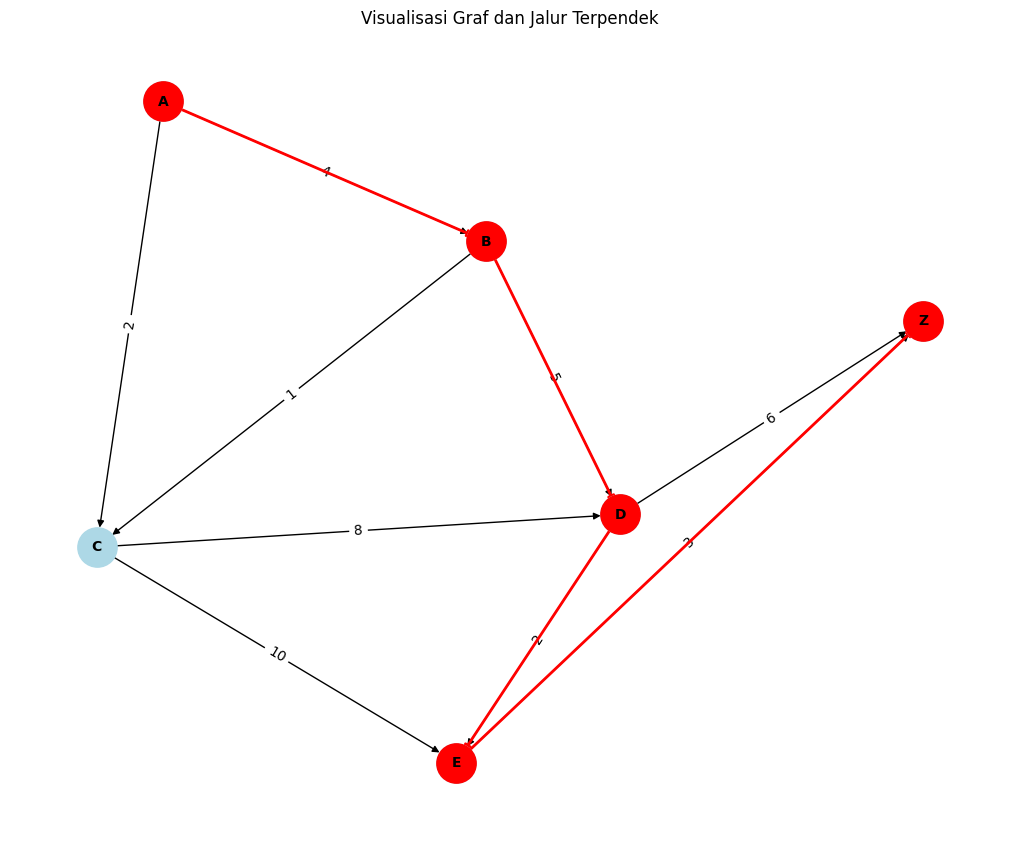

In [3]:
# Definisi graf contoh
graph = {
    'A': {'B': 4, 'C': 2},
    'B': {'C': 1, 'D': 5},
    'C': {'D': 8, 'E': 10},
    'D': {'E': 2, 'Z': 6},
    'E': {'Z': 3},
    'Z': {}
}

# Jalankan algoritma Dijkstra
start_node = 'A'
end_node = 'Z'
distances, previous = dijkstra_with_paths(graph, start_node)

# Dapatkan jalur terpendek
shortest_path = get_path(previous, end_node)

# Tampilkan hasil
print(f"Jarak dari {start_node} ke {end_node}: {distances[end_node]}")
print(f"Jalur terpendek: {' → '.join(shortest_path)}")

# Visualisasikan graf
visualize_graph(graph, path=shortest_path, layout='spring')

## Tugas

**Modifikasi Graf dengan Siklus**


Graf dengan siklus:
Jalur terpendek A ke E: A → B → C → D → E


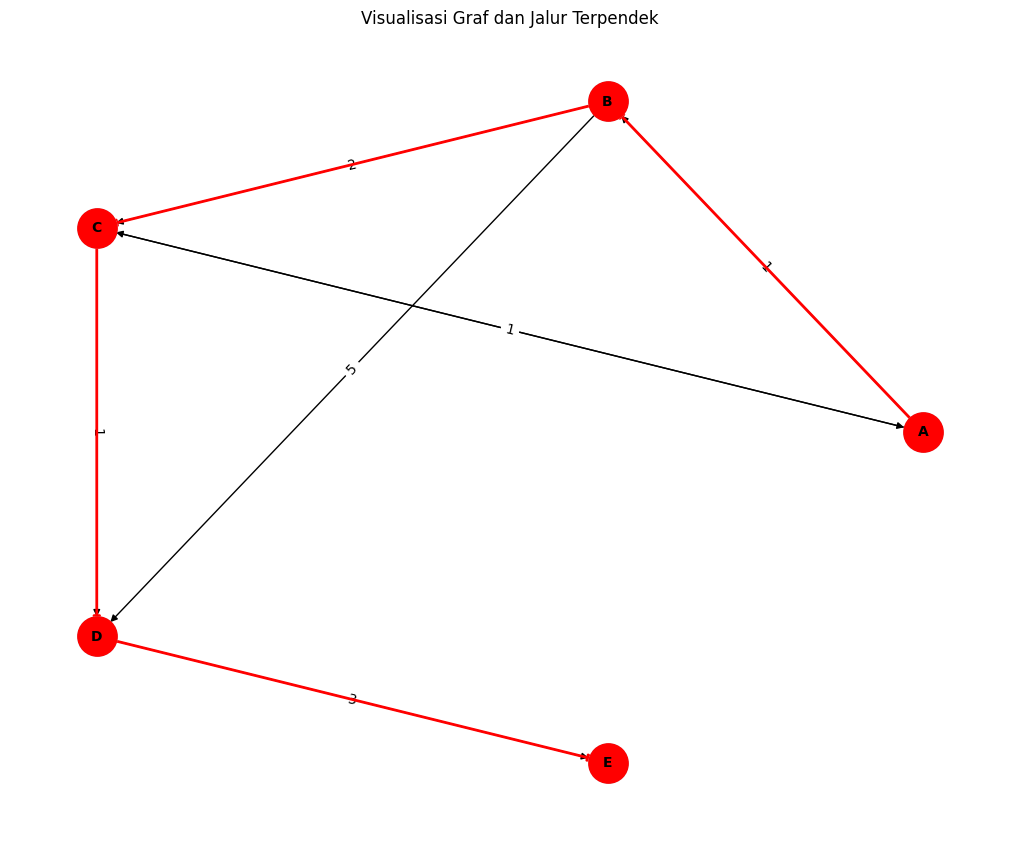

In [ ]:
# Graf dengan siklus
graph_with_cycle = {
    'A': {'B': 1, 'C': 4},
    'B': {'C': 2, 'D': 5},
    'C': {'D': 1, 'A': 1},  # Membuat siklus A->C->A
    'D': {'E': 3},
    'E': {}
}

# Jalankan Dijkstra
distances_cycle, previous_cycle = dijkstra_with_paths(graph_with_cycle, 'A')
path_cycle = get_path(previous_cycle, 'E')

print("\nGraf dengan siklus:")
print(f"Jalur terpendek A ke E: {' → '.join(path_cycle)}")
visualize_graph(graph_with_cycle, path=path_cycle, layout='circular')

**Menambahkan Simpul Baru**


Setelah menambahkan simpul F:
Jalur terpendek baru A ke Z: A → C → F → Z


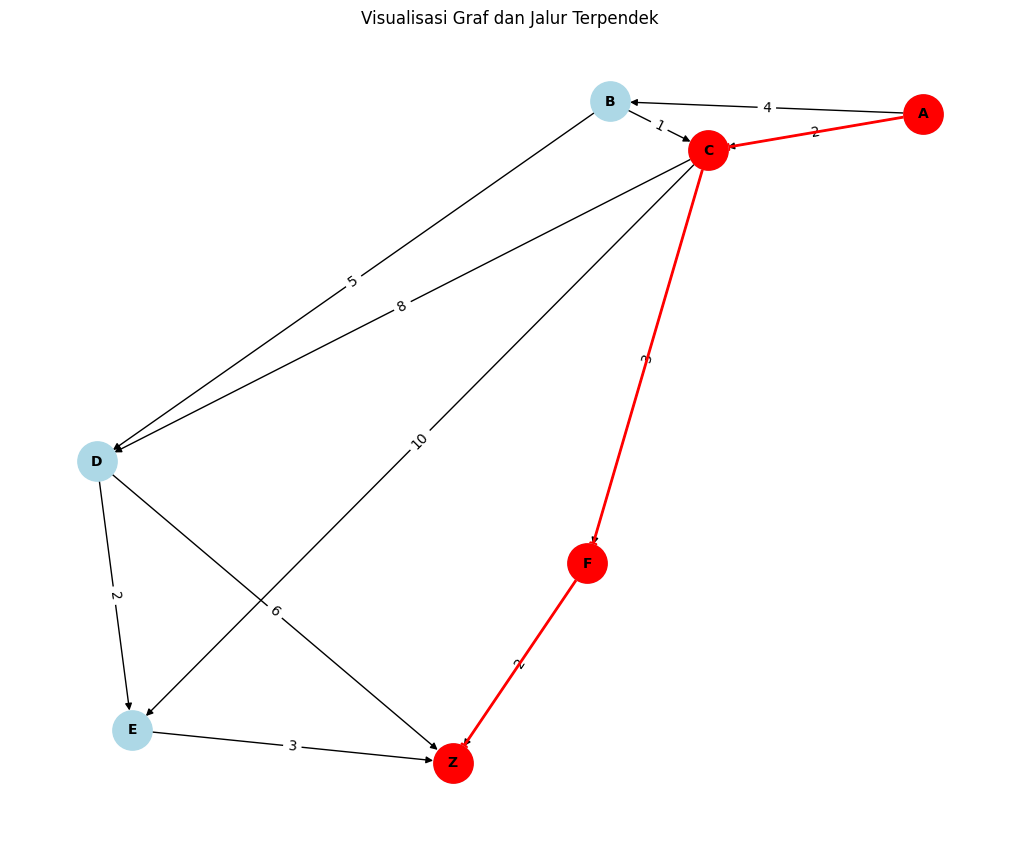

In [ ]:
# Tambahkan simpul baru ke graf asli
graph['F'] = {'Z': 2}
graph['C']['F'] = 3

# Jalankan Dijkstra lagi
distances_new, previous_new = dijkstra_with_paths(graph, 'A')
path_new = get_path(previous_new, 'Z')

print("\nSetelah menambahkan simpul F:")
print(f"Jalur terpendek baru A ke Z: {' → '.join(path_new)}")
visualize_graph(graph, path=path_new, layout='kamada_kawai')

**Menggunakan Berbagai Layout**


Visualisasi dengan berbagai layout:


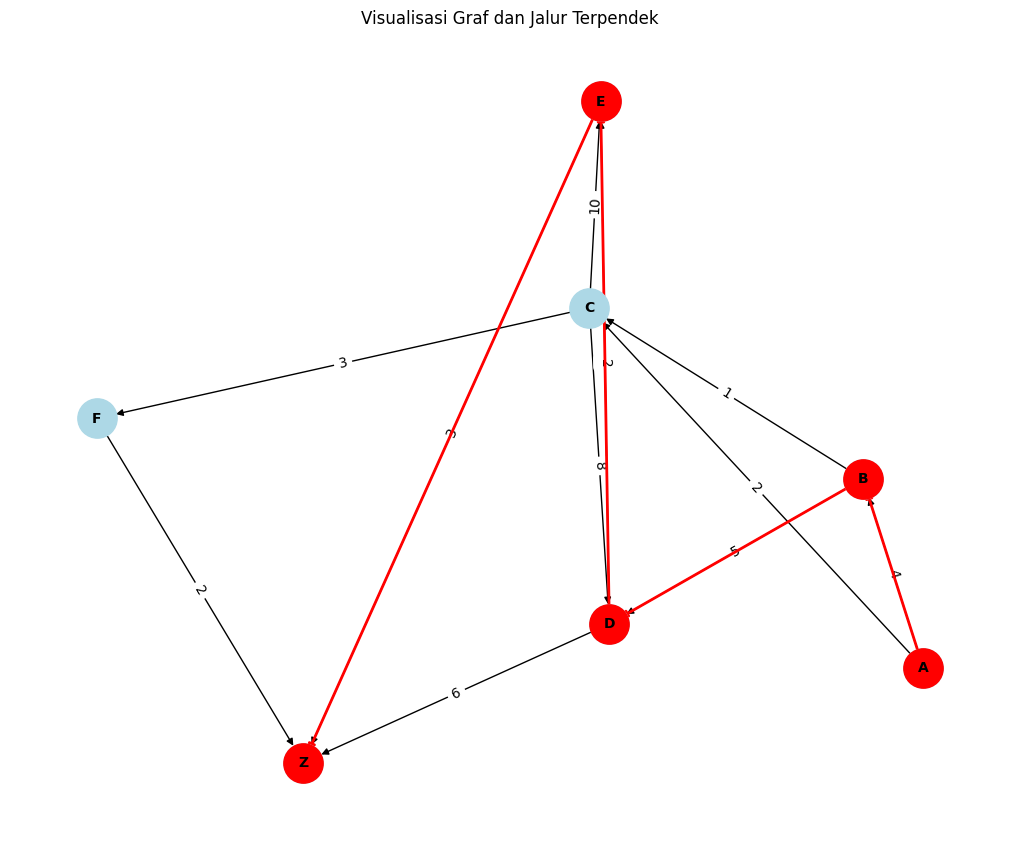

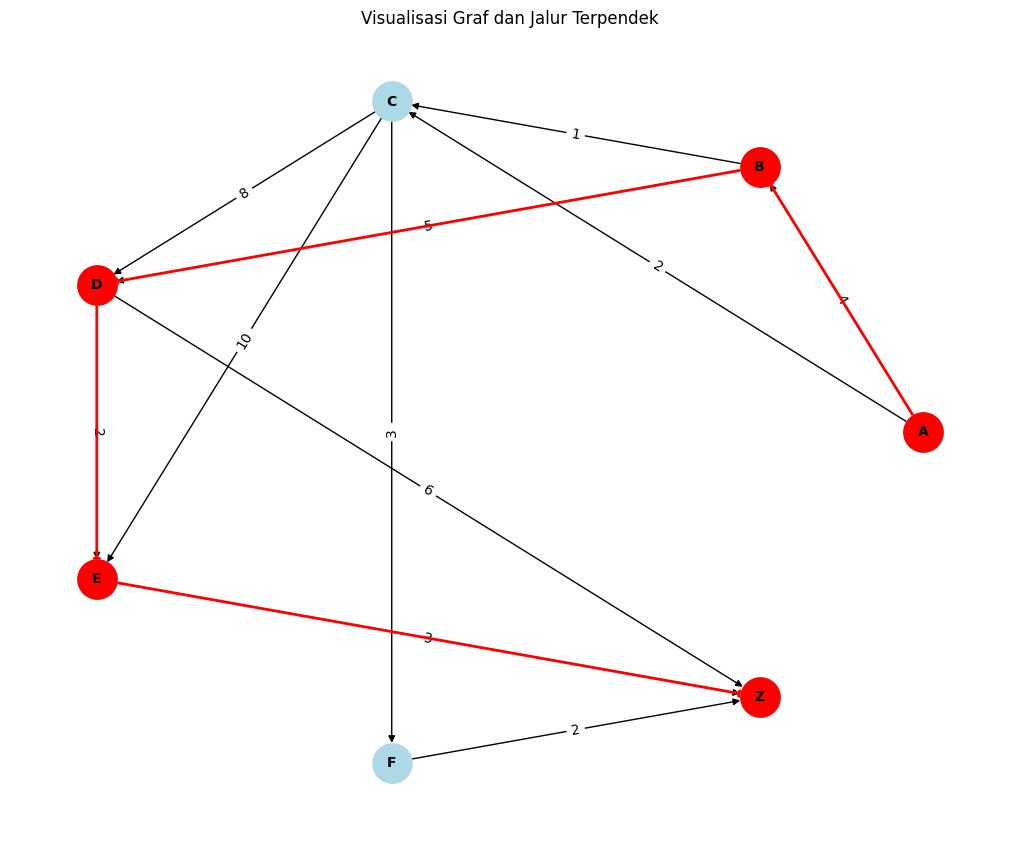

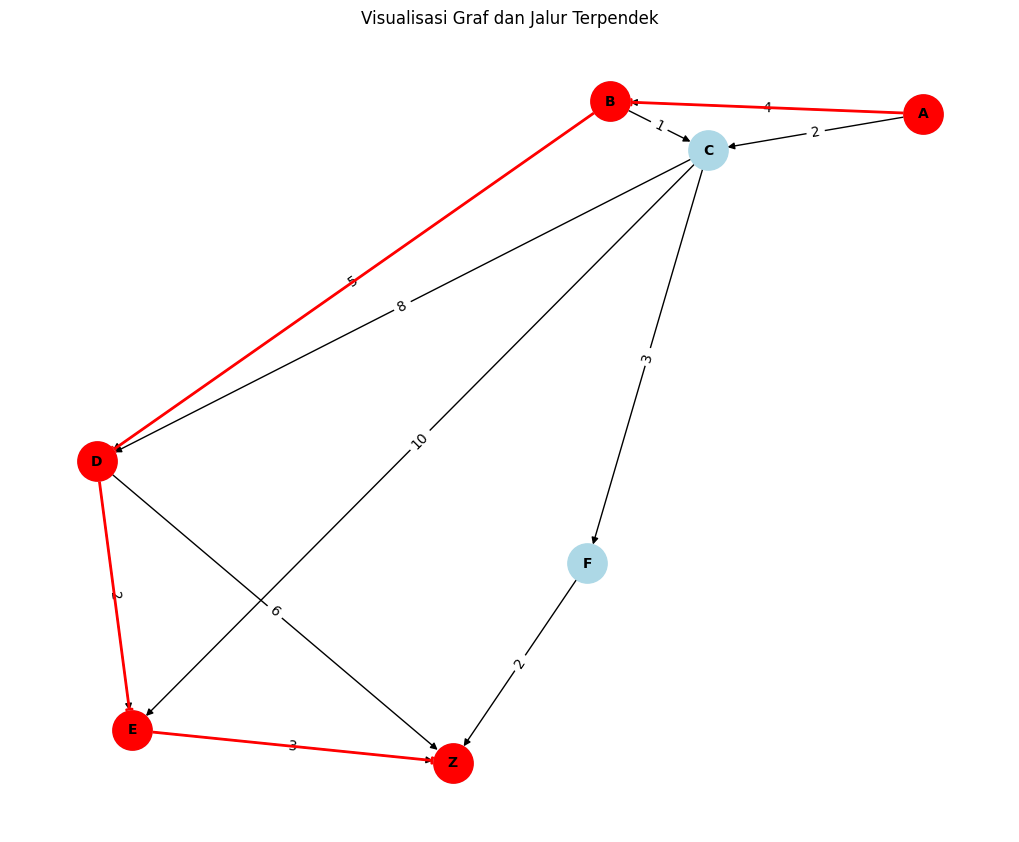

In [ ]:
# Visualisasi dengan berbagai layout
print("\nVisualisasi dengan berbagai layout:")
visualize_graph(graph, path=shortest_path, layout='spring')
visualize_graph(graph, path=shortest_path, layout='circular')
visualize_graph(graph, path=shortest_path, layout='kamada_kawai')